In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# DATA CLEANING AND FORMATION

In [39]:
import pandas as pd

df = pd.read_csv("genes.tsv", sep="\t")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Case                        1000 non-null   object 
 1   KRAS                        1000 non-null   float64
 2   ALK                         1000 non-null   float64
 3   EGFR                        1000 non-null   float64
 4   State                       980 non-null    object 
 5   Tobacco smoking status      932 non-null    object 
 6   Pack years smoked           635 non-null    object 
 7   Tobacco smoking onset year  429 non-null    object 
 8   Alcohol history             378 non-null    object 
 9   Tobacco smoking quit year   348 non-null    object 
 10  Alcohol intensity           329 non-null    object 
 11  Cigarettes per day          245 non-null    object 
 12  Years smoked                226 non-null    object 
 13  Alcohol days per week       0 non-

In [ ]:
# Replacing "not informative" entries with actual NaN
missing_indicators = [
    "Not Reported", "Unknown", "Smoking history not documented", 
    "Duration Not Specified", "NaN", "nan", "", " "
]
df_cleaned = df.replace(missing_indicators, np.nan)

#  Saving the cleaned data to a new TSV file
df_cleaned.to_csv("genes_cleaned.tsv", sep="\t", index=False)

# Counting and displaying unique values per column
for col in df_cleaned.columns:
    print(f"\n--- {col} ---")
    print(df_cleaned[col].value_counts(dropna=False))


--- Case ---
Case
TCGA-49-6761    1
C3N-02285       1
C3N-03425       1
C3L-04013       1
TCGA-MP-A4TF    1
               ..
C3N-00555       1
C3N-02828       1
CDDP-ACMK       1
C3N-02284       1
ER-ACGR         1
Name: count, Length: 1000, dtype: int64

--- KRAS ---
KRAS
-0.245754    2
-0.010940    2
-0.025529    2
 0.007189    2
-0.182854    2
            ..
 0.708281    1
-0.896557    1
-0.216921    1
-0.153087    1
-0.486470    1
Name: count, Length: 994, dtype: int64

--- ALK ---
ALK
-0.341325    9
-0.298280    4
-0.290062    3
-0.337982    3
-0.318479    3
            ..
-0.310818    1
-0.333176    1
-0.295634    1
-0.292290    1
 0.841914    1
Name: count, Length: 889, dtype: int64

--- EGFR ---
EGFR
-0.506139    2
 0.361936    1
 4.083988    1
 4.097055    1
-0.590008    1
            ..
 0.669001    1
 1.465800    1
 1.167237    1
 1.250439    1
-0.450463    1
Name: count, Length: 999, dtype: int64

--- State ---
State
released    980
NaN          20
Name: count, dtype: int

In [ ]:
import pandas as pd

df_cleaned = pd.read_csv("genes_cleaned.tsv", sep="\t") #load the dataset

# Showing unique values and their counts for each column
for col in df_cleaned.columns:
    print(f"\n--- {col} ---")
    print(df_cleaned[col].value_counts(dropna=False))



--- Case ---
Case
TCGA-49-6761    1
C3N-02285       1
C3N-03425       1
C3L-04013       1
TCGA-MP-A4TF    1
               ..
C3N-00555       1
C3N-02828       1
CDDP-ACMK       1
C3N-02284       1
ER-ACGR         1
Name: count, Length: 1000, dtype: int64

--- KRAS ---
KRAS
-0.245754    2
-0.010940    2
-0.025529    2
 0.007189    2
-0.182854    2
            ..
 0.708281    1
-0.896557    1
-0.216921    1
-0.153087    1
-0.486470    1
Name: count, Length: 994, dtype: int64

--- ALK ---
ALK
-0.341325    9
-0.298280    4
-0.290062    3
-0.337982    3
-0.318479    3
            ..
-0.310818    1
-0.333176    1
-0.295634    1
-0.292290    1
 0.841914    1
Name: count, Length: 889, dtype: int64

--- EGFR ---
EGFR
-0.506139    2
 0.361936    1
 4.083988    1
 4.097055    1
-0.590008    1
            ..
 0.669001    1
 1.465800    1
 1.167237    1
 1.250439    1
-0.450463    1
Name: count, Length: 999, dtype: int64

--- State ---
State
released    980
NaN          20
Name: count, dtype: int

In [ ]:
df_cleaned = df_cleaned.drop(columns=['Alcohol days per week'])
df_cleaned = df_cleaned.drop(columns=['Pack years smoked'])
df_cleaned = df_cleaned.drop(columns=['Tobacco smoking onset year'])
df_cleaned = df_cleaned.drop(columns=['Tobacco smoking quit year'])
df_cleaned.to_csv("genes_cleaned_updated.tsv", sep="\t", index=False)
#dropping empty or non-informative columns(dropped 'pack years smoked' because majority of data was '<146(633/635)'2)


In [49]:
df_cleaned[['KRAS', 'ALK', 'EGFR']].describe()


,KRAS,ALK,EGFR
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.421085e-17,1.989520e-16,6.536993e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-8.965574e-01,-3.413251e-01,-5.900076e-01
25%,-3.445697e-01,-3.004397e-01,-3.928282e-01
50%,-1.843959e-01,-2.201315e-01,-2.224310e-01
75%,7.223347e-02,-6.050782e-02,7.878515e-02
max,1.660211e+01,1.375237e+01,1.592624e+01


In [ ]:
# Filtering out the uncertain smoking status
df_filtered = df_cleaned[df_cleaned['Tobacco smoking status'] != 'Current Reformed Smoker, Duration Not Specified'].copy()

# Smoking status mapping 
smoking_map = {
    'Lifelong Non-Smoker': 0,
    'Current Reformed Smoker for > 15 yrs': 1,
    'Current Reformed Smoker for < or = 15 yrs': 2,
    'Current Smoker': 3
}

# Cigarettes per day mapping
cigs_map = {
    '≤12': 0,
    '>12 to 24': 1,
    '>24 to 36': 2,
    '>36 to 48': 3,
    '>48': 4
}

# Years smoked mapping
years_map = {
    '≤14': 0,
    '>14 to 28': 1,
    '>28 to 42': 2,
    '>42 to 56': 3,
    '>56': 4
}

# Alcohol history mapping
alcohol_hist_map = {
    'No': 0,
    'Yes': 1
}

# Alcohol intensity mapping
alcohol_int_map = {
    'Lifelong Non-Drinker': 0,
    'Non-Drinker': 1,
    'Occasional Drinker': 2
}

# Apply tobacco mappings
df_filtered['tobacco_status_score'] = df_filtered['Tobacco smoking status'].map(smoking_map)
df_filtered['cigs_score'] = df_filtered['Cigarettes per day'].map(cigs_map)
df_filtered['years_smoked_score'] = df_filtered['Years smoked'].map(years_map)
df_filtered['tobacco_risk'] = df_filtered[['tobacco_status_score', 'cigs_score', 'years_smoked_score']].sum(axis=1, skipna=True)

# Apply alcohol mappings
df_filtered['alcohol_hist_score'] = df_filtered['Alcohol history'].map(alcohol_hist_map)
df_filtered['alcohol_int_score'] = df_filtered['Alcohol intensity'].map(alcohol_int_map)
df_filtered['alcohol_risk'] = df_filtered[['alcohol_hist_score', 'alcohol_int_score']].sum(axis=1, skipna=True)


In [112]:
df_filtered[['tobacco_risk', 'alcohol_risk']].describe()


,tobacco_risk,alcohol_risk
count,940.000000,940.000000
mean,2.169149,0.532979
std,2.068606,1.141705
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,10.000000,3.000000


In [97]:
# Select the desired columns
df_selected = df_cleaned[['Case', 'KRAS', 'ALK', 'EGFR', 'tobacco_risk', 'alcohol_risk']]

# Save to a new TSV file
df_selected.to_csv("genes_risk_summary.tsv", sep="\t", index=False)


# EXPLORATORY DATA ANALYSIS

### EGFR Expression by Tobacco Risk Score(Boxplot)

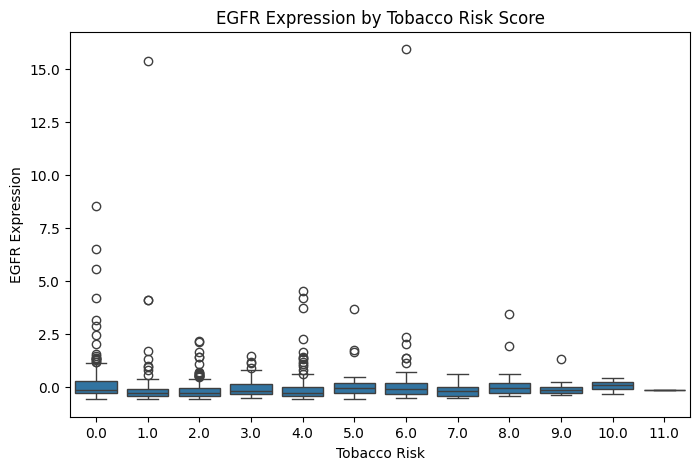

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# filtering out patients with missing tobacco_risk
tobacco_df = df_cleaned[df_cleaned['tobacco_risk'].notna()]

# Boxplot: EGFR expression vs. tobacco risk score
plt.figure(figsize=(8, 5))
sns.boxplot(x='tobacco_risk', y='EGFR', data=tobacco_df)
plt.title('EGFR Expression by Tobacco Risk Score')
plt.xlabel('Tobacco Risk')
plt.ylabel('EGFR Expression')
plt.show()


### KRAS Expression by Tobacco Risk Score(Boxplot)

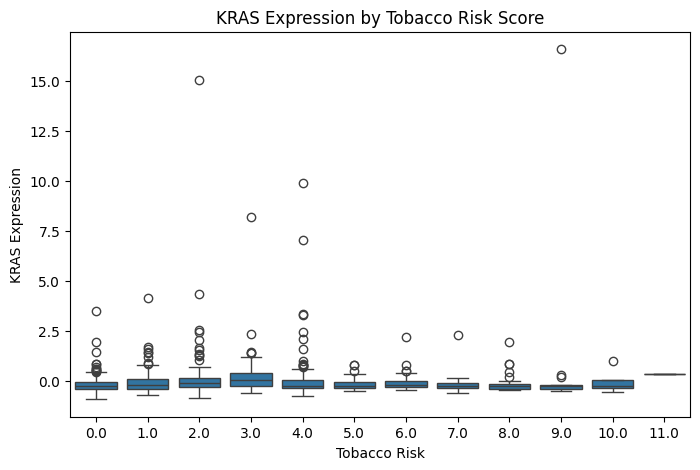

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out patients with missing tobacco_risk
tobacco_df = df_cleaned[df_cleaned['tobacco_risk'].notna()]

# Boxplot: EGFR expression vs. tobacco risk score
plt.figure(figsize=(8, 5))
sns.boxplot(x='tobacco_risk', y='KRAS', data=tobacco_df)
plt.title('KRAS Expression by Tobacco Risk Score')
plt.xlabel('Tobacco Risk')
plt.ylabel('KRAS Expression')
plt.show()


### ALK Expression by Tobacco Risk Score(Boxplot)

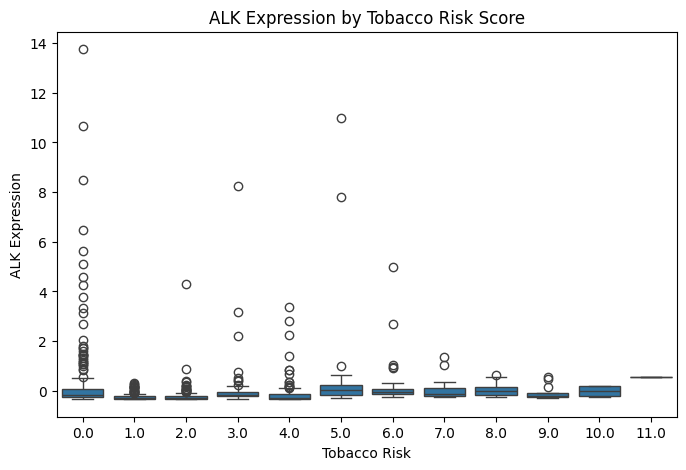

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out patients with missing tobacco_risk
tobacco_df = df_cleaned[df_cleaned['tobacco_risk'].notna()]

# Boxplot: EGFR expression vs. tobacco risk score
plt.figure(figsize=(8, 5))
sns.boxplot(x='tobacco_risk', y='ALK', data=tobacco_df)
plt.title('ALK Expression by Tobacco Risk Score')
plt.xlabel('Tobacco Risk')
plt.ylabel('ALK Expression')
plt.show()


### EGFR Expression By Alhocol Risk Score(Boxplot)

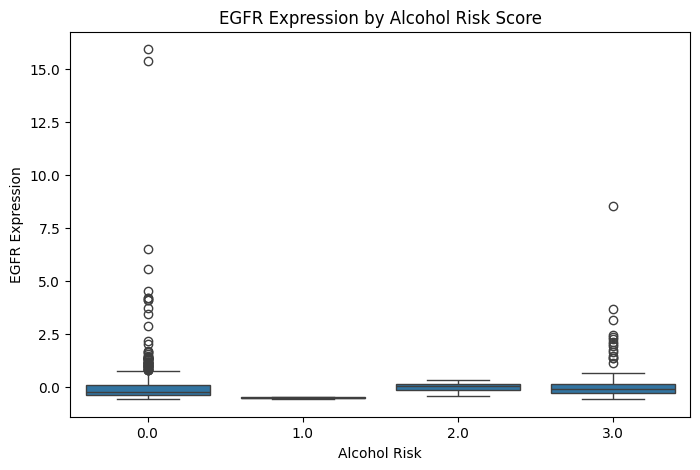

In [101]:
# Filter out patients with missing alcohol_risk
alcohol_df = df_cleaned[df_cleaned['alcohol_risk'].notna()]

# Boxplot: EGFR expression vs. alcohol risk score
plt.figure(figsize=(8, 5))
sns.boxplot(x='alcohol_risk', y='EGFR', data=alcohol_df)
plt.title('EGFR Expression by Alcohol Risk Score')
plt.xlabel('Alcohol Risk')
plt.ylabel('EGFR Expression')
plt.show()


### KRAS Expression By Alhocol Risk Score(Boxplot)

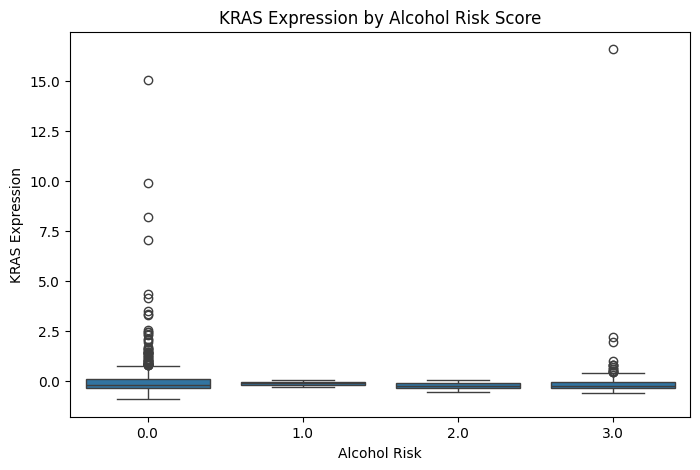

In [102]:
# Filter out patients with missing alcohol_risk
alcohol_df = df_cleaned[df_cleaned['alcohol_risk'].notna()]

# Boxplot: EGFR expression vs. alcohol risk score
plt.figure(figsize=(8, 5))
sns.boxplot(x='alcohol_risk', y='KRAS', data=alcohol_df)
plt.title('KRAS Expression by Alcohol Risk Score')
plt.xlabel('Alcohol Risk')
plt.ylabel('KRAS Expression')
plt.show()


### ALK Expression By Alhocol Risk Score(Boxplot)

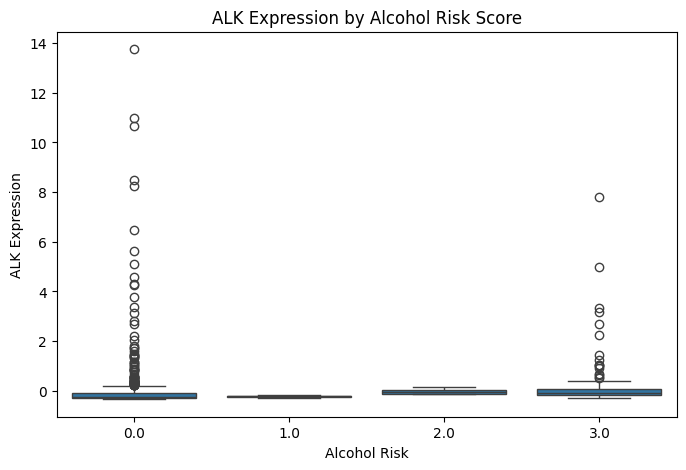

In [103]:
# Filter out patients with missing alcohol_risk
alcohol_df = df_cleaned[df_cleaned['alcohol_risk'].notna()]

# Boxplot: EGFR expression vs. alcohol risk score
plt.figure(figsize=(8, 5))
sns.boxplot(x='alcohol_risk', y='ALK', data=alcohol_df)
plt.title('ALK Expression by Alcohol Risk Score')
plt.xlabel('Alcohol Risk')
plt.ylabel('ALK Expression')
plt.show()


### Pairplot of Gene Expression by Tobacca and Alcohol Risk:

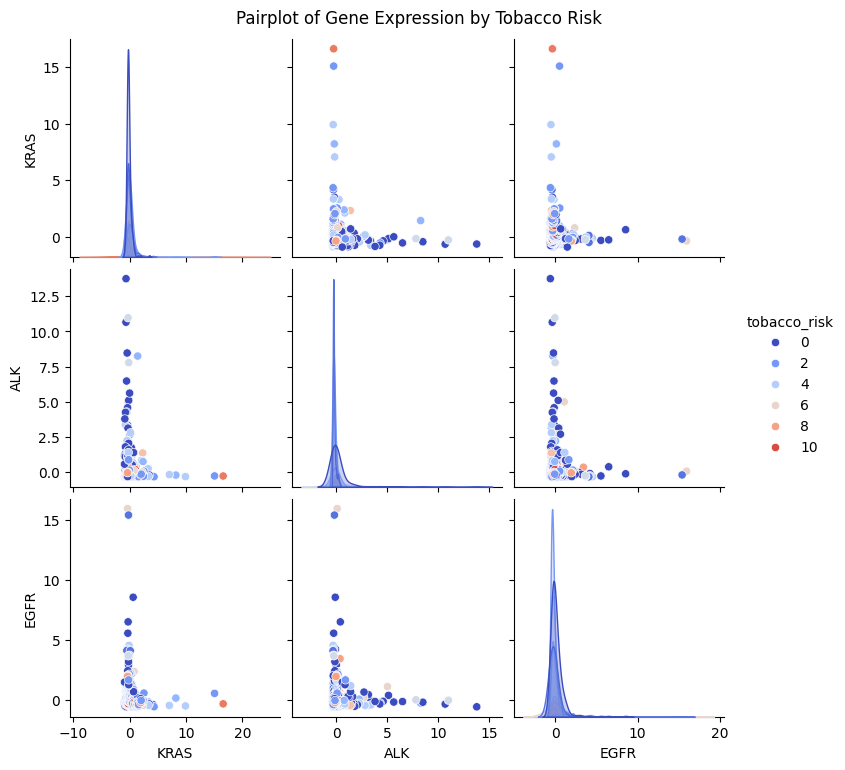

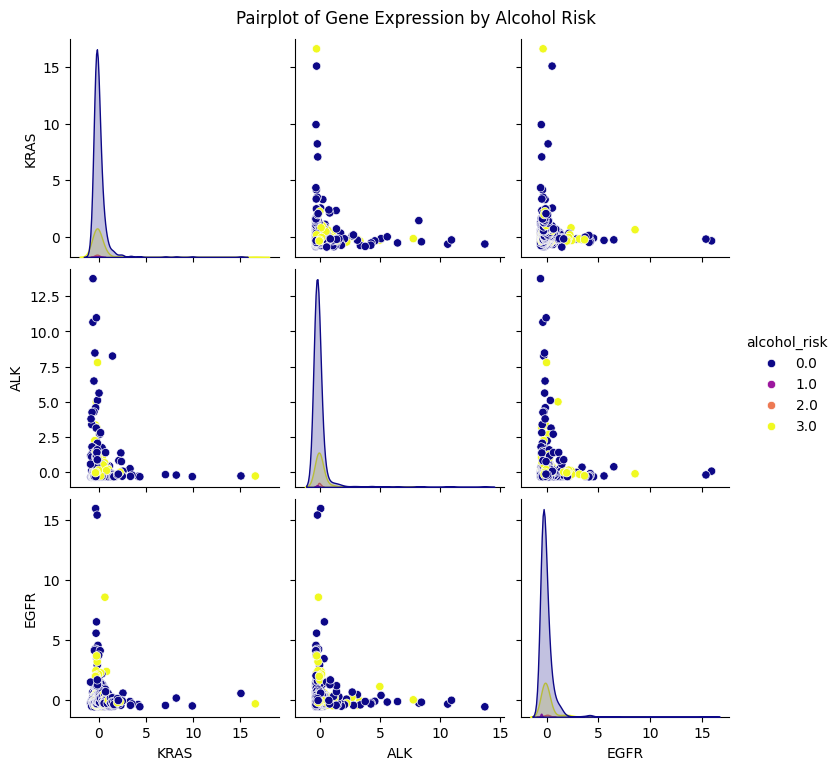

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure risk scores are numeric
tobacco_df['tobacco_risk'] = pd.to_numeric(tobacco_df['tobacco_risk'], errors='coerce')
alcohol_df['alcohol_risk'] = pd.to_numeric(alcohol_df['alcohol_risk'], errors='coerce')

# Pairplot for gene expression colored by tobacco risk
sns.pairplot(tobacco_df[['KRAS', 'ALK', 'EGFR', 'tobacco_risk']], hue='tobacco_risk', palette="coolwarm")
plt.suptitle("Pairplot of Gene Expression by Tobacco Risk", y=1.02)
plt.show()

# Pairplot for gene expression colored by alcohol risk
sns.pairplot(alcohol_df[['KRAS', 'ALK', 'EGFR', 'alcohol_risk']], hue='alcohol_risk', palette="plasma")
plt.suptitle("Pairplot of Gene Expression by Alcohol Risk", y=1.02)
plt.show()


### All Three Gene Expressions by Tobacco Risk(KDE):

C:\Users\ardat\AppData\Local\Temp\ipykernel_18372\3004314228.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tobacco_df, x='EGFR', hue='tobacco_risk', common_norm=False, palette="viridis")


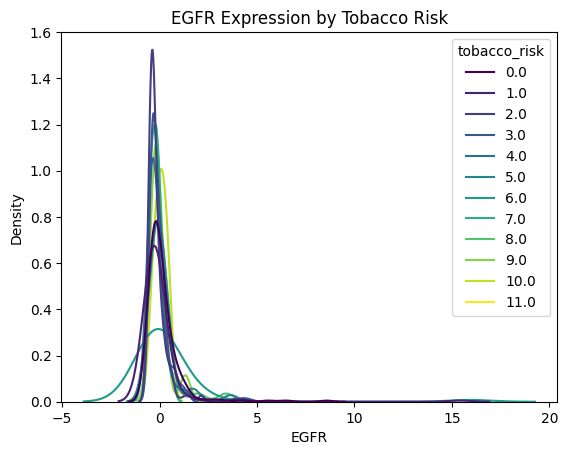

C:\Users\ardat\AppData\Local\Temp\ipykernel_18372\3004314228.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tobacco_df, x='KRAS', hue='tobacco_risk', common_norm=False, palette="viridis")


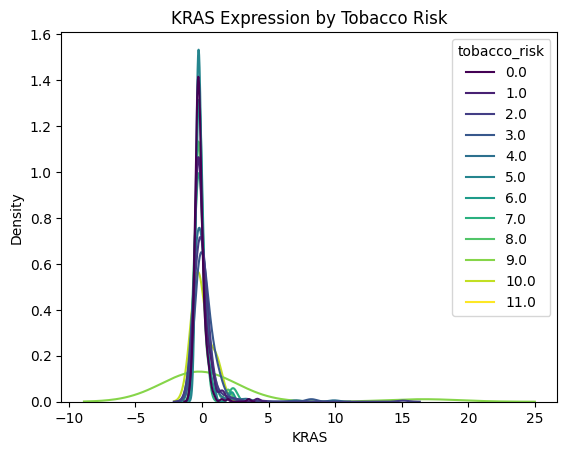

C:\Users\ardat\AppData\Local\Temp\ipykernel_18372\3004314228.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tobacco_df, x='ALK', hue='tobacco_risk', common_norm=False, palette="viridis")


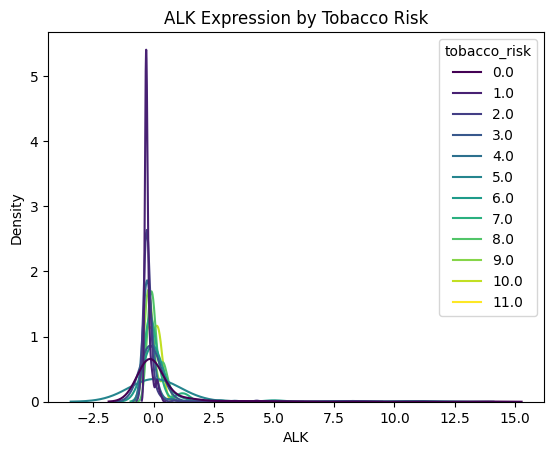

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure tobacco_risk is numeric
tobacco_df['tobacco_risk'] = pd.to_numeric(tobacco_df['tobacco_risk'], errors='coerce')

# KDE for EGFR
sns.kdeplot(data=tobacco_df, x='EGFR', hue='tobacco_risk', common_norm=False, palette="viridis")
plt.title("EGFR Expression by Tobacco Risk")
plt.xlabel("EGFR")
plt.ylabel("Density")
plt.show()

# KDE for KRAS
sns.kdeplot(data=tobacco_df, x='KRAS', hue='tobacco_risk', common_norm=False, palette="viridis")
plt.title("KRAS Expression by Tobacco Risk")
plt.xlabel("KRAS")
plt.ylabel("Density")
plt.show()

# KDE for ALK
sns.kdeplot(data=tobacco_df, x='ALK', hue='tobacco_risk', common_norm=False, palette="viridis")
plt.title("ALK Expression by Tobacco Risk")
plt.xlabel("ALK")
plt.ylabel("Density")
plt.show()


### All Three Gene Expressions by Alcohol Risk(KDE):

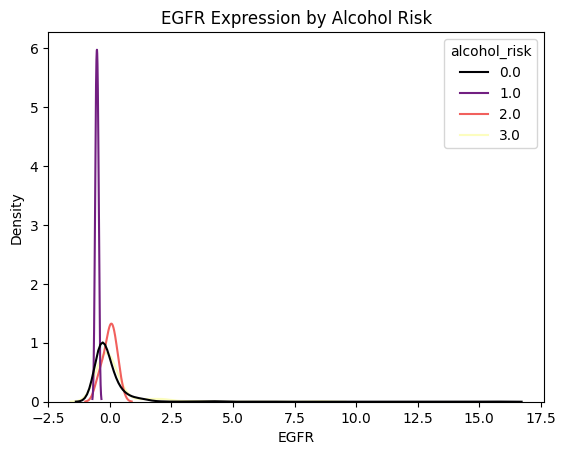

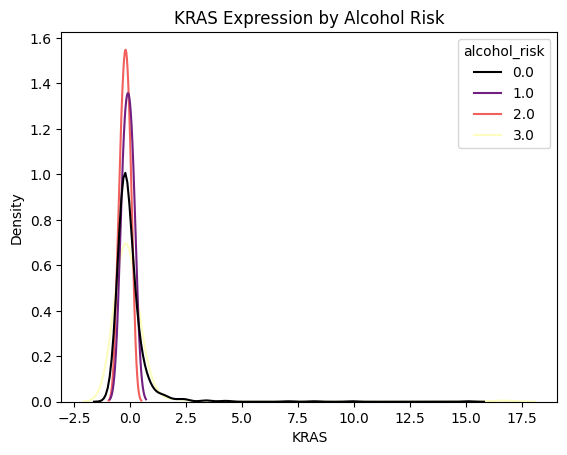

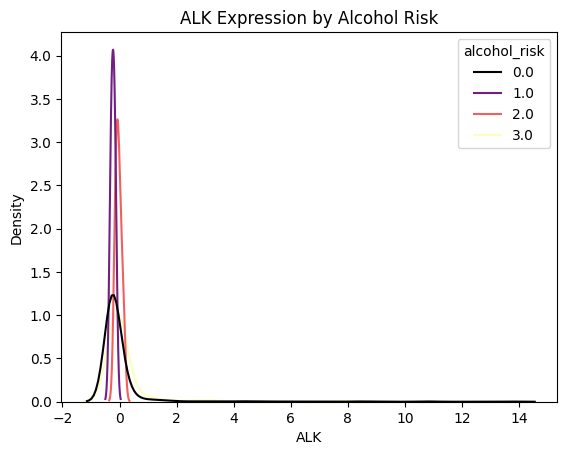

In [106]:
# Ensure alcohol_risk is numeric
alcohol_df['alcohol_risk'] = pd.to_numeric(alcohol_df['alcohol_risk'], errors='coerce')

# KDE for EGFR
sns.kdeplot(data=alcohol_df, x='EGFR', hue='alcohol_risk', common_norm=False, palette="magma")
plt.title("EGFR Expression by Alcohol Risk")
plt.xlabel("EGFR")
plt.ylabel("Density")
plt.show()

# KDE for KRAS
sns.kdeplot(data=alcohol_df, x='KRAS', hue='alcohol_risk', common_norm=False, palette="magma")
plt.title("KRAS Expression by Alcohol Risk")
plt.xlabel("KRAS")
plt.ylabel("Density")
plt.show()

# KDE for ALK
sns.kdeplot(data=alcohol_df, x='ALK', hue='alcohol_risk', common_norm=False, palette="magma")
plt.title("ALK Expression by Alcohol Risk")
plt.xlabel("ALK")
plt.ylabel("Density")
plt.show()


### Grouped Boxplot of Gene Expression by Tobacco Risk:

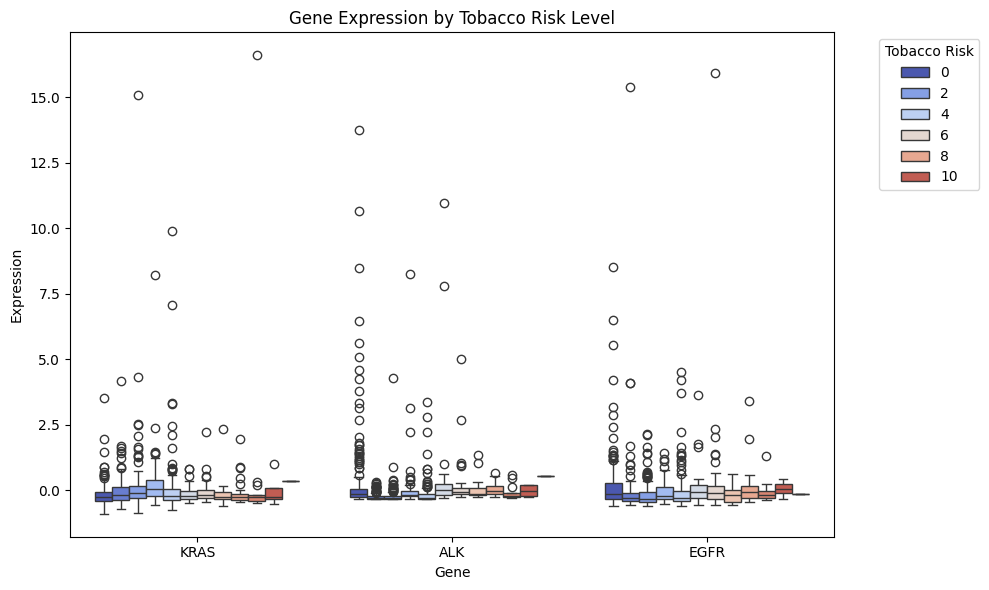

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt for tobacco
tobacco_melted = tobacco_df.melt(id_vars='tobacco_risk', value_vars=['KRAS', 'ALK', 'EGFR'],
                                  var_name='Gene', value_name='Expression')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gene', y='Expression', hue='tobacco_risk', data=tobacco_melted, palette='coolwarm')
plt.title('Gene Expression by Tobacco Risk Level')
plt.legend(title='Tobacco Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Grouped Boxplot of Gene Expression by Alcohol Risk:

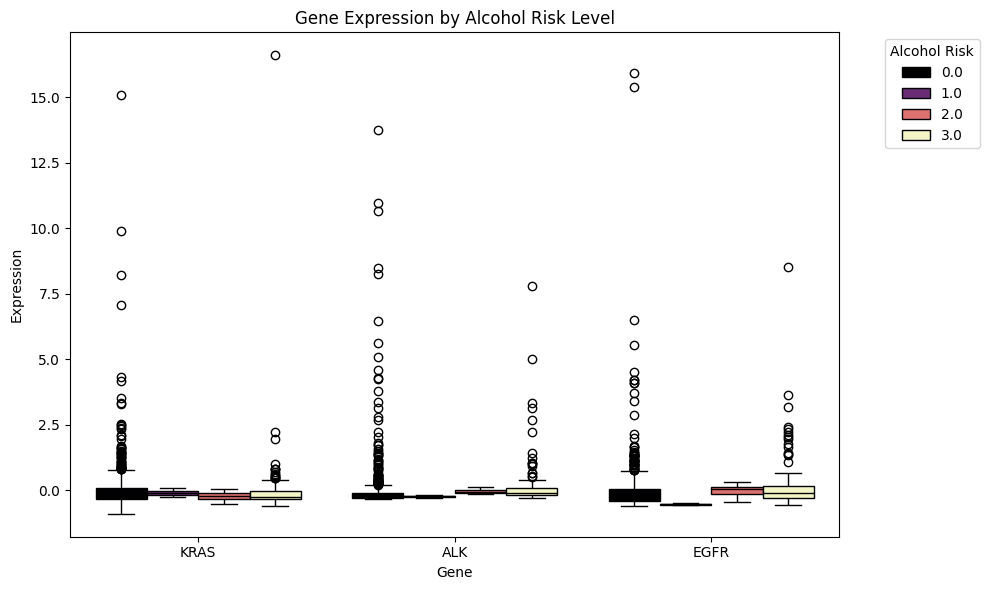

In [108]:
# Melt for alcohol
alcohol_melted = alcohol_df.melt(id_vars='alcohol_risk', value_vars=['KRAS', 'ALK', 'EGFR'],
                                  var_name='Gene', value_name='Expression')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gene', y='Expression', hue='alcohol_risk', data=alcohol_melted, palette='magma')
plt.title('Gene Expression by Alcohol Risk Level')
plt.legend(title='Alcohol Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# HYPOTHESIS TESTING

Null Hypothesis(H0): Tobacco and alcohol usage has no significant effect on the expression levels of lung cancer related genes KRAS, EGFR and ALK.

Alternative Hypothesis(H1): Tobacco and alcohol usage significantly influences the expression of cancer related genes KRAS, EGFR and ALK.




### One-Way ANOVA for 2 Risk Groups:

In [109]:
from scipy.stats import f_oneway

# Tobacco: test gene expression across tobacco_risk groups
def run_anova_on_gene(df, risk_col, gene):
    groups = [group[gene].dropna() for name, group in df.groupby(risk_col) if len(group[gene].dropna()) > 1]
    f_stat, p_val = f_oneway(*groups)
    print(f"{gene} vs {risk_col} ANOVA → F = {f_stat:.3f}, p = {p_val:.4f}")

# Run for all genes and both risk types
for gene in ['EGFR', 'KRAS', 'ALK']:
    run_anova_on_gene(tobacco_df, 'tobacco_risk', gene)
    run_anova_on_gene(alcohol_df, 'alcohol_risk', gene)


EGFR vs tobacco_risk ANOVA → F = 2.303, p = 0.0113
EGFR vs alcohol_risk ANOVA → F = 1.189, p = 0.3129
KRAS vs tobacco_risk ANOVA → F = 3.229, p = 0.0004
KRAS vs alcohol_risk ANOVA → F = 0.119, p = 0.9490
ALK vs tobacco_risk ANOVA → F = 5.342, p = 0.0000
ALK vs alcohol_risk ANOVA → F = 1.253, p = 0.2893


### Spearman Correlation of Genes vs. Tobacco/Alcohol Risk:

In [110]:
from scipy.stats import spearmanr

def corr_report(df, risk_col):
    print(f"\nCorrelation with {risk_col}")
    for gene in ['EGFR', 'KRAS', 'ALK']:
        corr, pval = spearmanr(df[risk_col], df[gene], nan_policy='omit')
        print(f"{gene}: Spearman r = {corr:.3f}, p = {pval:.4f}")

# Run for both groups
corr_report(tobacco_df, 'tobacco_risk')
corr_report(alcohol_df, 'alcohol_risk')



Correlation with tobacco_risk
EGFR: Spearman r = -0.043, p = 0.1792
KRAS: Spearman r = 0.085, p = 0.0069
ALK: Spearman r = 0.086, p = 0.0062

Correlation with alcohol_risk
EGFR: Spearman r = 0.125, p = 0.0001
KRAS: Spearman r = -0.033, p = 0.2926
ALK: Spearman r = 0.328, p = 0.0000


### Genes vs tobacco_risk (pairwise t-tests + Cohen's d):

In [111]:
from scipy.stats import ttest_ind
from itertools import combinations
import numpy as np

# Function for Cohen's d
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*np.std(x, ddof=1)**2 + (ny - 1)*np.std(y, ddof=1)**2) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

# Function to run pairwise t-tests and compute effect sizes
def pairwise_tests(df, risk_col, gene):
    print(f"\n{gene} vs {risk_col} (pairwise t-tests + Cohen's d):")
    unique_groups = df[risk_col].dropna().unique()
    pairs = list(combinations(sorted(unique_groups), 2))
    for g1, g2 in pairs:
        x = df[df[risk_col] == g1][gene].dropna()
        y = df[df[risk_col] == g2][gene].dropna()
        if len(x) > 1 and len(y) > 1:
            t_stat, p_val = ttest_ind(x, y)
            d = cohens_d(x, y)
            print(f"{g1} vs {g2}: t = {t_stat:.3f}, p = {p_val:.4f}, Cohen's d = {d:.3f}")

# Run for each gene and both risk types
for gene in ['EGFR', 'KRAS', 'ALK']:
    pairwise_tests(tobacco_df, 'tobacco_risk', gene)
    pairwise_tests(alcohol_df, 'alcohol_risk', gene)



EGFR vs tobacco_risk (pairwise t-tests + Cohen's d):
0.0 vs 1.0: t = 1.686, p = 0.0926, Cohen's d = 0.174
0.0 vs 2.0: t = 4.377, p = 0.0000, Cohen's d = 0.418
0.0 vs 3.0: t = 2.044, p = 0.0417, Cohen's d = 0.254
0.0 vs 4.0: t = 2.598, p = 0.0097, Cohen's d = 0.261
0.0 vs 5.0: t = 0.278, p = 0.7813, Cohen's d = 0.048
0.0 vs 6.0: t = -1.204, p = 0.2297, Cohen's d = -0.191
0.0 vs 7.0: t = 1.475, p = 0.1414, Cohen's d = 0.335
0.0 vs 8.0: t = 0.067, p = 0.9463, Cohen's d = 0.013
0.0 vs 9.0: t = 0.666, p = 0.5058, Cohen's d = 0.190
0.0 vs 10.0: t = 0.202, p = 0.8401, Cohen's d = 0.102
1.0 vs 2.0: t = 1.195, p = 0.2329, Cohen's d = 0.130
1.0 vs 3.0: t = 0.126, p = 0.9001, Cohen's d = 0.017
1.0 vs 4.0: t = 0.242, p = 0.8086, Cohen's d = 0.027
1.0 vs 5.0: t = -0.656, p = 0.5127, Cohen's d = -0.119
1.0 vs 6.0: t = -1.593, p = 0.1128, Cohen's d = -0.266
1.0 vs 7.0: t = 0.372, p = 0.7100, Cohen's d = 0.087
1.0 vs 8.0: t = -0.689, p = 0.4920, Cohen's d = -0.142
1.0 vs 9.0: t = -0.050, p = 0.9604, 